# Author : Gaurav Khandave
# Title : Final Exam Project
# Date : 12/04/2016
# Version : 1.0

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math
import multiprocessing
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
trainData = pd.read_csv("DMTheWaterTableTraining.csv")

In [3]:
testData = pd.read_csv("DMTheWaterTableTest.csv")

In [4]:
trainData.columns

Index([u'id', u'amount_tsh', u'date_recorded', u'funder', u'gps_height',
       u'installer', u'longitude', u'latitude', u'wpt_name', u'num_private',
       u'basin', u'subvillage', u'region', u'region_code', u'district_code',
       u'lga', u'ward', u'population', u'public_meeting', u'recorded_by',
       u'scheme_management', u'scheme_name', u'permit', u'construction_year',
       u'extraction_type', u'extraction_type_group', u'extraction_type_class',
       u'management', u'management_group', u'payment', u'payment_type',
       u'water_quality', u'quality_group', u'quantity', u'quantity_group',
       u'source', u'source_type', u'source_class', u'waterpoint_type',
       u'waterpoint_type_group', u'status_group'],
      dtype='object')

### EDA on train data

In [5]:
trainData

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000,3/14/11,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0,3/6/13,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25,2/25/13,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0,1/28/13,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0,7/13/11,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20,3/13/11,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0,10/1/12,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0,10/9/12,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0,11/3/12,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0,8/3/11,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


### Value count of each column to determine whether the column data is categorical or serial.

In [6]:
for column in trainData.columns:
    print "Value Counts of ",column," :"
    print "*****************************"
    print trainData[column].value_counts()
    print "*****************************"

Value Counts of  id  :
*****************************
72255    1
50572    1
40509    1
42350    1
22297    1
57395    1
34162    1
15250    1
52601    1
1408     1
40321    1
68995    1
48519    1
21896    1
49056    1
54670    1
46378    1
1424     1
32145    1
30098    1
52629    1
54678    1
19865    1
30106    1
65476    1
13726    1
36255    1
66976    1
26018    1
52643    1
        ..
72386    1
54009    1
15044    1
27334    1
29383    1
15048    1
12598    1
6076     1
43732    1
4821     1
27350    1
17111    1
70361    1
43742    1
10976    1
53985    1
4837     1
35558    1
46549    1
4841     1
56042    1
70379    1
41711    1
10992    1
27378    1
23498    1
757      1
759      1
23288    1
28807    1
Name: id, dtype: int64
*****************************
Value Counts of  amount_tsh  :
*****************************
0        1423
500       107
50         92
200        53
20         50
1000       41
10         25
100        23
2000       21
30         19
250        16
300     

In [7]:
categorical_columns = ["waterpoint_type_group","waterpoint_type","source_class","source_type","source","quantity","water_quality","payment","management_group","extraction_type_class","permit","recorded_by","public_meeting"]

In [8]:
# From above analysis we can get categorical columns
#categorical_columns = ["waterpoint_type_group","waterpoint_type","source_class","source_type","source","quantity_group","quantity","quality_group","water_quality","payment_type","payment","management_group","management","extraction_type_class","extraction_type_group","extraction_type","permit","scheme_management","recorded_by","public_meeting"]

### We'll try to find if any column has missing values or not

In [9]:
nullColumns = []
for column in trainData.columns:
    if trainData[trainData[column].isnull()].shape[0] > 0:
        print "Missing values are present in the ",column
        nullColumns.append(column)
        print "*****************************"

Missing values are present in the  funder
*****************************
Missing values are present in the  installer
*****************************
Missing values are present in the  subvillage
*****************************
Missing values are present in the  public_meeting
*****************************
Missing values are present in the  scheme_management
*****************************
Missing values are present in the  scheme_name
*****************************
Missing values are present in the  permit
*****************************


In [10]:
for column in nullColumns:
    print "********* ",column," **********"
    print trainData[column]
    print "*********************************"
    print "Value counts of ",column," :"
    print "*********************************"
    print trainData[column].value_counts()

*********  funder  **********
0                          Roman
1                        Grumeti
2                   Lottery Club
3                         Unicef
4                    Action In A
5            Mkinga Distric Coun
6                           Dwsp
7                          Rwssp
8                       Wateraid
9                    Isingiro Ho
10                       Private
11                        Danida
12                  World Vision
13       Lawatefuka Water Supply
14                         Biore
15                         Rudep
16                        Unicef
17                        Unicef
18                        Hesawa
19                        Danida
20                           Twe
21                          Dwsp
22                        Unicef
23                           Isf
24      African Development Bank
25        Government Of Tanzania
26                        Sobodo
27                        Hesawa
28        Government Of Tanzania
29       Lawa

### Handling the missing values :
    * From above results we can see that the values missing are not numerical so we can't take mean and replace with NAs. 
    * We will replace missing values with highest occured values of each column.


In [11]:
trainData.funder.fillna('Government Of Tanzania',inplace=True)
trainData.installer.fillna('DWE',inplace=True)
trainData.subvillage.fillna('Shuleni',inplace=True)
trainData.public_meeting.fillna('True',inplace=True)
trainData.scheme_management.fillna('VWC',inplace=True)
trainData.scheme_name.fillna('K',inplace=True)
trainData.permit.fillna('True',inplace=True)

### Now all the missing values are handled

In [12]:
X = pd.DataFrame()
for column in categorical_columns:
    X[column]=trainData[column]

X["status_group"]=trainData["status_group"]

In [13]:
# We will pop out the output column and treat it as y.
y = X.pop("status_group")
y= pd.get_dummies(y == 'functional')

In [14]:


for variable in categorical_columns:
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

1000 trees
C-stat:  0.783859903236

1200 trees
C-stat:  0.784145568665

1300 trees
C-stat:  0.784339700454

1500 trees
C-stat:  0.784217487955

1700 trees
C-stat:  0.784283372059

2000 trees
C-stat:  0.784626371747

2300 trees
C-stat:  0.784650512488

2500 trees
C-stat:  0.78459820755



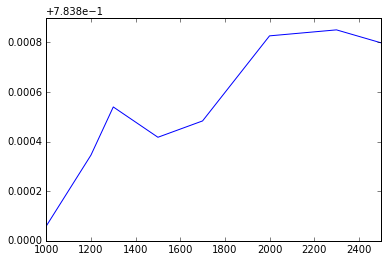

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
n_estimator_options = [1000,1200,1300,1500,1700,2000,2300,2500]
results=[]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  0.784650512488

None option
C-stat:  0.784650512488

sqrt option
C-stat:  0.789313698864

log2 option
C-stat:  0.788944546707

0.9 option
C-stat:  0.785412957542

0.2 option
C-stat:  0.789424343925



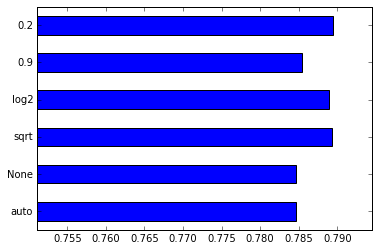

In [16]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=2300, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.75110,.79450));

1 min samples
C-stat:  0.789424343925

2 min samples
C-stat:  0.794801693875

3 min samples
C-stat:  0.793118883088

4 min samples
C-stat:  0.792135147912

5 min samples
C-stat:  0.790078155647

6 min samples
C-stat:  0.788355110293

7 min samples
C-stat:  0.786641117716

8 min samples
C-stat:  0.784456380699

9 min samples
C-stat:  0.783849844594

10 min samples
C-stat:  0.78162487301

20 min samples
C-stat:  0.772903024634

50 min samples
C-stat:  0.75956828309



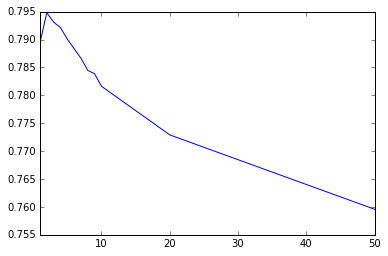

In [17]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,20,50]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=2300, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features=0.2, 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

In [18]:
model = RandomForestRegressor(n_estimators=2300, 
                              oob_score=True, 
                              n_jobs=1, 
                              random_state=42, 
                              max_features=0.2, 
                              min_samples_leaf=2)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.794801693875


In [19]:
testData.funder.fillna('Government Of Tanzania',inplace=True)
testData.installer.fillna('DWE',inplace=True)
testData.subvillage.fillna('Shuleni',inplace=True)
testData.public_meeting.fillna('True',inplace=True)
testData.scheme_management.fillna('VWC',inplace=True)
testData.scheme_name.fillna('K',inplace=True)
testData.permit.fillna('True',inplace=True)

In [20]:
X_Test = pd.DataFrame()
for column in categorical_columns:
    X_Test[column]=testData[column]

In [21]:
for variable in categorical_columns:
    # Create array of dummies
    dummies = pd.get_dummies(X_Test[variable], prefix=variable)
    # Update X_Test to include dummies and drop the main variable
    X_Test = pd.concat([X_Test, dummies], axis=1)
    X_Test.drop([variable], axis=1, inplace=True)

In [22]:
X.columns

Index([u'waterpoint_type_group_cattle trough',
       u'waterpoint_type_group_communal standpipe',
       u'waterpoint_type_group_hand pump',
       u'waterpoint_type_group_improved spring',
       u'waterpoint_type_group_other', u'waterpoint_type_cattle trough',
       u'waterpoint_type_communal standpipe',
       u'waterpoint_type_communal standpipe multiple',
       u'waterpoint_type_hand pump', u'waterpoint_type_improved spring',
       u'waterpoint_type_other', u'source_class_groundwater',
       u'source_class_surface', u'source_class_unknown',
       u'source_type_borehole', u'source_type_dam', u'source_type_other',
       u'source_type_rainwater harvesting', u'source_type_river/lake',
       u'source_type_shallow well', u'source_type_spring', u'source_dam',
       u'source_hand dtw', u'source_lake', u'source_machine dbh',
       u'source_other', u'source_rainwater harvesting', u'source_river',
       u'source_shallow well', u'source_spring', u'quantity_dry',
       u'quantity_e

In [23]:
X_Test.columns

Index([u'waterpoint_type_group_cattle trough',
       u'waterpoint_type_group_communal standpipe',
       u'waterpoint_type_group_hand pump',
       u'waterpoint_type_group_improved spring',
       u'waterpoint_type_group_other', u'waterpoint_type_cattle trough',
       u'waterpoint_type_communal standpipe',
       u'waterpoint_type_communal standpipe multiple',
       u'waterpoint_type_hand pump', u'waterpoint_type_improved spring',
       u'waterpoint_type_other', u'source_class_groundwater',
       u'source_class_surface', u'source_class_unknown',
       u'source_type_borehole', u'source_type_dam', u'source_type_other',
       u'source_type_rainwater harvesting', u'source_type_river/lake',
       u'source_type_shallow well', u'source_type_spring', u'source_dam',
       u'source_hand dtw', u'source_lake', u'source_machine dbh',
       u'source_other', u'source_rainwater harvesting', u'source_river',
       u'source_shallow well', u'source_spring', u'source_unknown',
       u'quantity

In [24]:
for column in X.columns:
    if not column in X_Test.columns:
        print column

extraction_type_class_wind-powered


In [25]:
y_pred = model.predict(X_Test)

In [26]:
roc = roc_auc_score(y, y_pred)
print "AUC Score: ", roc

ValueError: Found arrays with inconsistent numbers of samples: [ 799 1999]